In [1]:
import random

class BankAccount:
    def __init__(self, account_id, initial_balance):
        self.account_id = account_id
        self.balance = initial_balance

    def deposit(self, amount):
        self.balance += amount

    def withdraw(self, amount):
        if self.balance >= amount:
            self.balance -= amount

def generate_accounts(num_accounts, seed_value):
    random.seed(seed_value)
    accounts = []

    for i in range(num_accounts):
        initial_balance = random.randint(1000, 10000)
        account = BankAccount(i, initial_balance)

        for _ in range(10):
            if random.choice(['deposit', 'withdrawal']) == 'deposit':
                account.deposit(random.randint(100, 500))
            else:
                account.withdraw(random.randint(100, 500))

        accounts.append(account)

    return accounts

def print_sorted_accounts(accounts):
    accounts.sort(key=lambda x: x.balance)

    print(f"{'Account ID':<10}{'Final Balance':<15}")
    print("-" * 25)

    for account in accounts:
        print(f"{account.account_id:<10}{account.balance:<15}")


accounts = generate_accounts(100, 42)
print_sorted_accounts(accounts)


Account IDFinal Balance  
-------------------------
28        914            
25        958            
69        1014           
83        1053           
37        1178           
94        1215           
84        1233           
98        1309           
73        1318           
75        1380           
51        1444           
77        1705           
93        2041           
33        2381           
15        2475           
90        2665           
89        2949           
41        3029           
82        3032           
91        3138           
71        3152           
79        3154           
14        3401           
27        3416           
20        3561           
68        3697           
18        3795           
22        4048           
70        4055           
7         4069           
92        4084           
19        4145           
97        4296           
95        4312           
12        4357           
8         4441           
76        45

Loan closed after 120 months. Interest saved: -1552968.54


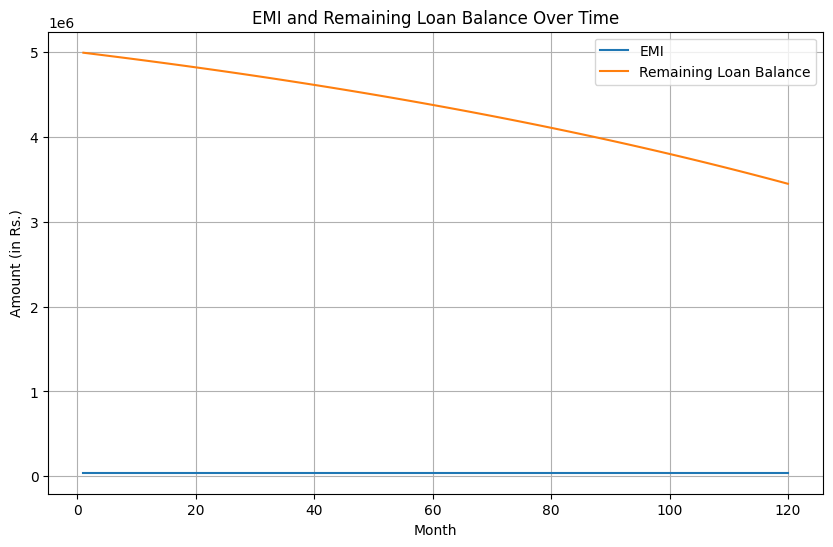

In [3]:
import matplotlib.pyplot as plt


def calculate_emi(principal, annual_rate, tenure_years):
    monthly_rate = annual_rate / 12 / 100
    tenure_months = tenure_years * 12
    emi = principal * monthly_rate * ((1 + monthly_rate) ** tenure_months) / (((1 + monthly_rate) ** tenure_months) - 1)
    return emi


def loan_scheme(principal, annual_rate, tenure_years, early_closure_month=None):
    emi = calculate_emi(principal, annual_rate, tenure_years)
    tenure_months = tenure_years * 12
    remaining_balance = principal
    total_interest = 0


    emi_list = []
    balance_list = []


    for month in range(1, tenure_months + 1):
        interest = remaining_balance * (annual_rate / 12 / 100)
        principal_payment = emi - interest
        remaining_balance -= principal_payment
        total_interest += interest


        emi_list.append(emi)
        balance_list.append(remaining_balance if remaining_balance > 0 else 0)


        if early_closure_month and month == early_closure_month:
            break


    if early_closure_month:
        remaining_interest = total_interest - (early_closure_month * emi)
        print(f"Loan closed after {early_closure_month} months. Interest saved: {remaining_interest:.2f}")


    months = range(1, len(emi_list) + 1)


    plt.figure(figsize=(10, 6))
    plt.plot(months, emi_list, label='EMI')
    plt.plot(months, balance_list, label='Remaining Loan Balance')
    plt.title('EMI and Remaining Loan Balance Over Time')
    plt.xlabel('Month')
    plt.ylabel('Amount (in Rs.)')
    plt.legend()
    plt.grid(True)
    plt.show()


principal = 5000000
annual_rate = 8
tenure_years = 20


loan_scheme(principal, annual_rate, tenure_years, early_closure_month=120)
